**Outliers**  are data points that differ significantly from other observations in a dataset.
   - **Importance:** Identifying outliers is crucial in data preprocessing to ensure data quality, as they can skew results in statistical analyses.
   - **Common Causes:**
     - Data entry errors.
     - Experimental errors.
     - Natural variations.

#### **Methods to Identify Outliers**

**Interquartile Range (IQR) Method:**

     - Identifies outliers by measuring the spread of the middle 50% of the data.
     - Q1 (25th Percentile): The value below which 25% of the data falls.
     - Q3 (75th Percentile): The value below which 75% of the data falls.
     - IQR: The difference between Q3 and Q1, representing the middle 50% of the data.
     Formula: ( IQR = Q3 - Q1 )

- Lower Bound: Any value below Q1 - 1.5 * IQR is considered an
outlier.
- Upper Bound: Any value above Q3 + 1.5 * IQR is considered an
outlier.



In [ ]:
import pandas as pd

# Example data (Extended dataset)
data = {
    'Age': [22, 25, 47, 35, 46, 55, 67, 23, 30, 78, 29, 33, 80, 90, 21, 22, 85, 55, 60, 75,
            150, 160, -10, 200, 5, 100, 110, 45, 40, 95]
}
df = pd.DataFrame(data)
df



In [ ]:
# Step 1: Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)

# Step 2: Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# Step 3: Calculate the lower bound and upper bound for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 4: Identify the outliers
outliers = df[(df['Age'] < lower_bound) | (df['Age'] > upper_bound)]

# Display the results
print(f"Q1 (25th Percentile): {Q1}")
print(f"Q3 (75th Percentile): {Q3}")
print(f"IQR: {IQR}")
print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")
print("Outliers detected:", outliers['Age'].tolist())

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate Q1, Q3, and IQR
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1

# Create the boxplot using Seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Age'])

# Add text annotations for Q1, Q3, and IQR
plt.text(Q1, 0.1, f'Q1: {Q1:.2f}', horizontalalignment='center', color='blue')
plt.text(Q3, 0.1, f'Q3: {Q3:.2f}', horizontalalignment='center', color='blue')
plt.text((Q1 + Q3) / 2, 0.3, f'IQR: {IQR:.2f}', horizontalalignment='center', color='red')

# Set labels and title
plt.title("Boxplot with Q1, Q3, and IQR Annotations")
plt.xlabel("Age")

# Display the plot
plt.show()

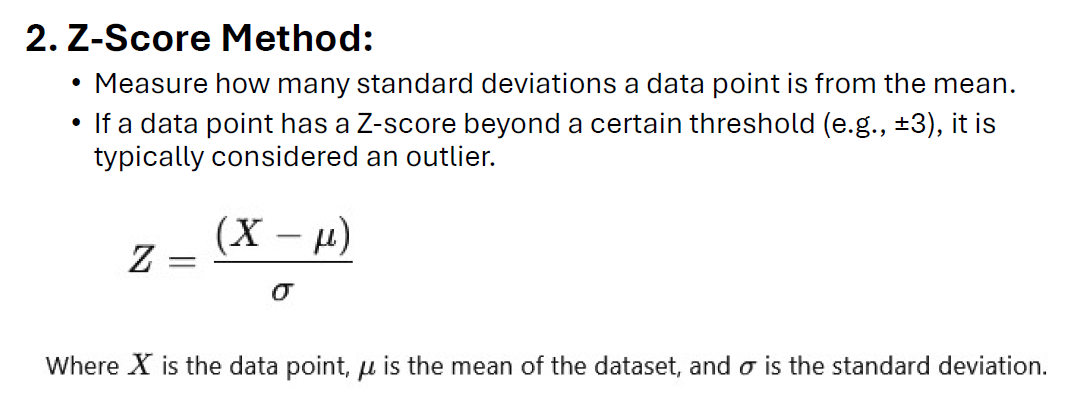

In [ ]:
import pandas as pd
from scipy import stats

# Example dataset with potential outliers
data = {
    'Value': [10, 12, 12, 13, 12, 11, 12, 14, 13, 15, 16, 18, 300, -100]
}

# Convert the data into a Pandas DataFrame
df = pd.DataFrame(data)

# Calculate the Z-scores for each data point
df['Z_score'] = stats.zscore(df['Value'])

# Define the threshold for identifying outliers
threshold = 3  # Common threshold is Z > 3 or Z < -3

# Identify outliers
outliers = df[(df['Z_score'] > threshold) | (df['Z_score'] < -threshold)]

# Display the DataFrame with Z-scores
print("Data with Z-scores:")
print(df)

# Display the outliers
print("\nOutliers detected:")
print(outliers)

3. Visual Methods (Scatter Plot, Histogram):
- Scatter Plot: Visualization that display the relationship between two
variables.
- Outliers are points that far from the general cluster of data.
- Histogram: Visualization that display the frequency distribution of data.
- Outliers may appear as bars that are isolated from the rest of the data distribution.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Example dataset
data = {
    'Age': [22, 25, 47, 35, 46, 55, 67, 23, 30, 78, 29, 33, 80, 90, 21, 22, 85, 55, 60, 75,
            150, 160, -10, 200, 5, 100, 110, 45, 40, 95],
    'Salary': [30, 35, 47, 50, 52, 65, 78, 40, 45, 85, 48, 50, 90, 110, 20, 28, 100, 65, 72, 88,
               250, 300, 5, 400, 10, 150, 170, 60, 55, 140]
}

# Convert the data into a Pandas DataFrame
df = pd.DataFrame(data)
df

In [ ]:
# Scatter Plot: Age vs Salary
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['Salary'], color='blue', label='Data Points')
plt.title("Scatter Plot of Age vs Salary (with potential outliers)")
plt.xlabel('Age')
plt.ylabel('Salary')

# Show the scatter plot
plt.show()

In [ ]:
# Histogram for 'Age' variable
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=10, kde=False, color='green')
plt.title('Histogram of Age (with potential outliers)')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Show the histogram
plt.show()

4. Density-Based Methods (DBSCAN):
- DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is
an unsupervised learning algorithm that can identify outliers by
considering points that do not belong to any cluster.

In [ ]:
import pandas as pd
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import numpy as np

# Example dataset (2D data for better visualization)
data = {
    'Age': [22, 25, 47, 35, 46, 55, 67, 23, 30, 78, 29, 33, 80, 90, 21, 22, 85, 55, 60, 75,
            150, 160, -10, 200, 5, 100, 110, 45, 40, 95],
    'Salary': [30, 35, 47, 50, 52, 65, 78, 40, 45, 85, 48, 50, 90, 110, 20, 28, 100, 65, 72, 88,
               250, 300, 5, 400, 10, 150, 170, 60, 55, 140]
}

# Convert the data into a Pandas DataFrame
df = pd.DataFrame(data)

# Convert the data into a NumPy array for DBSCAN
X = df[['Age', 'Salary']].values

# Apply DBSCAN algorithm
dbscan = DBSCAN(eps=25, min_samples=3)
dbscan.fit(X)

# Add DBSCAN labels to the DataFrame
df['Cluster'] = dbscan.labels_

# Identify outliers (DBSCAN labels them as -1)
outliers = df[df['Cluster'] == -1]

# Print the outliers
print("Outliers detected by DBSCAN:")
print(outliers)

# Plot the results
plt.figure(figsize=(10, 6))

# Plot data points
plt.scatter(df['Age'], df['Salary'], c=df['Cluster'], cmap='viridis', label='Data Points')

# Highlight the outliers
plt.scatter(outliers['Age'], outliers['Salary'], color='red', label='Outliers', edgecolors='black')

# Add title and labels
plt.title("DBSCAN Clustering with Outliers Highlighted")
plt.xlabel("Age")
plt.ylabel("Salary")
plt.legend()

# Show the plot
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Example dataset
data = {
    'Age': [22, 25, 47, 35, 46, 55, 67, np.nan, 30, 78, 29, 33, 80, 90, 21, 22, np.nan, 55, 60, 75,
            150, 160, -10, 200, 5, 100, 110, 45, 40, 95],
    'Salary': [30, np.nan, 47, 50, 52, 65, 78, 40, np.nan, 85, 48, 50, 90, 110, 20, 28, 100, 65, 72, 88,
               250, 300, 5, 400, 10, 150, 170, 60, 55, np.nan]
}

# Convert the data into a Pandas DataFrame
df = pd.DataFrame(data)

df.head()

In [ ]:
### Step 1: Data Preprocessing ###
# Handling missing values (filling with mean)
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Salary'].fillna(df['Salary'].mean(), inplace=True)

# Normalize/scale data for better handling of outliers
df['Age'] = (df['Age'] - df['Age'].mean()) / df['Age'].std()
df['Salary'] = (df['Salary'] - df['Salary'].mean()) / df['Salary'].std()

print("Preprocessed Data:")
df.head()




In [ ]:
### Step 2: Identifying Outliers (Z-score method) ###
df['Z_score_Age'] = stats.zscore(df['Age'])
df['Z_score_Salary'] = stats.zscore(df['Salary'])

# Z-score threshold for detecting outliers
z_threshold = 3

# Identify outliers based on Z-score
outliers_z = df[(df['Z_score_Age'].abs() > z_threshold) | (df['Z_score_Salary'].abs() > z_threshold)]
print("\nOutliers detected using Z-score method:")
outliers_z



In [ ]:
### Step 3: Identifying Outliers (IQR method) ###
Q1_Age = df['Age'].quantile(0.25)
Q3_Age = df['Age'].quantile(0.75)
IQR_Age = Q3_Age - Q1_Age

Q1_Salary = df['Salary'].quantile(0.25)
Q3_Salary = df['Salary'].quantile(0.75)
IQR_Salary = Q3_Salary - Q1_Salary

# Define bounds for outliers
lower_bound_Age = Q1_Age - 1.5 * IQR_Age
upper_bound_Age = Q3_Age + 1.5 * IQR_Age

lower_bound_Salary = Q1_Salary - 1.5 * IQR_Salary
upper_bound_Salary = Q3_Salary + 1.5 * IQR_Salary

# Identify outliers based on IQR
outliers_iqr = df[(df['Age'] < lower_bound_Age) | (df['Age'] > upper_bound_Age) |
                  (df['Salary'] < lower_bound_Salary) | (df['Salary'] > upper_bound_Salary)]

print("\nOutliers detected using IQR method:")
outliers_iqr



In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Age', 'Salary']])

# Add title and labels
plt.title('Boxplot of Age and Salary (with potential outliers using IQR)')
plt.xlabel('Variables')
plt.ylabel('Values')

# Show the plot
plt.show()

In [ ]:
### Step 4: Visualization ###
# Scatter plot to visualize Age vs Salary and outliers (Z-score method)
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['Salary'], label='Data Points')
plt.scatter(outliers_z['Age'], outliers_z['Salary'], color='red', label='Outliers (Z-score)')
plt.title('Scatter Plot of Age vs Salary with Outliers Highlighted (Z-score method)')
plt.xlabel('Age (normalized)')
plt.ylabel('Salary (normalized)')
plt.legend()
plt.show()

# Histogram to visualize the distribution of 'Age' and identify outliers
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=10, kde=False, color='green')
plt.title('Histogram of Age (with potential outliers)')
plt.xlabel('Age (normalized)')
plt.ylabel('Frequency')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Example dataset
data = {
    'Age': [22, 25, 47, 35, 46, 55, 67, 23, 30, 78, 29, 33, 80, 90, 21, 22, 85, 55, 60, 75,
            150, 160, -10, 200, 5, 100, 110, 45, 40, 95],
    'Salary': [30, 35, 47, 50, 52, 65, 78, 40, 45, 85, 48, 50, 90, 110, 20, 28, 100, 65, 72, 88,
               250, 300, 5, 400, 10, 150, 170, 60, 55, 140]
}

# Convert the data into a Pandas DataFrame
df = pd.DataFrame(data)

df

In [ ]:
### Step 1: Detect Outliers using Z-score ###
df['Z_score_Age'] = stats.zscore(df['Age'])
df['Z_score_Salary'] = stats.zscore(df['Salary'])

# Define the threshold for detecting outliers
z_threshold = 3

# Identify outliers based on Z-score
outliers = df[(df['Z_score_Age'].abs() > z_threshold) | (df['Z_score_Salary'].abs() > z_threshold)]
print("Outliers Detected:")
outliers




In [ ]:
### Step 2: Treating Outliers ###

# 1. Removing Outliers
df_removed_outliers = df[(df['Z_score_Age'].abs() <= z_threshold) & (df['Z_score_Salary'].abs() <= z_threshold)]
print("\nData After Removing Outliers:")
df_removed_outliers



In [ ]:
# 2. Capping/Flooring Outliers (using IQR method)
Q1_Age = df['Age'].quantile(0.25)
Q3_Age = df['Age'].quantile(0.75)
IQR_Age = Q3_Age - Q1_Age

Q1_Salary = df['Salary'].quantile(0.25)
Q3_Salary = df['Salary'].quantile(0.75)
IQR_Salary = Q3_Salary - Q1_Salary

lower_bound_Age = Q1_Age - 1.5 * IQR_Age
upper_bound_Age = Q3_Age + 1.5 * IQR_Age

lower_bound_Salary = Q1_Salary - 1.5 * IQR_Salary
upper_bound_Salary = Q3_Salary + 1.5 * IQR_Salary

df_capped = df.copy()
df_capped['Age'] = np.where(df_capped['Age'] < lower_bound_Age, lower_bound_Age, df_capped['Age'])
df_capped['Age'] = np.where(df_capped['Age'] > upper_bound_Age, upper_bound_Age, df_capped['Age'])
df_capped['Salary'] = np.where(df_capped['Salary'] < lower_bound_Salary, lower_bound_Salary, df_capped['Salary'])
df_capped['Salary'] = np.where(df_capped['Salary'] > upper_bound_Salary, upper_bound_Salary, df_capped['Salary'])
print("\nData After Capping/Flooring Outliers:")
df_capped



In [ ]:
# 3. Transforming Data (Logarithmic Transformation)
df_transformed_log = df.copy()
df_transformed_log['Age'] = np.log1p(df_transformed_log['Age'] - df_transformed_log['Age'].min() + 1)
df_transformed_log['Salary'] = np.log1p(df_transformed_log['Salary'] - df_transformed_log['Salary'].min() + 1)
print("\nData After Logarithmic Transformation:")
df_transformed_log



In [ ]:
# 4. Imputing Outliers with the Median
df_imputed = df.copy()
df_imputed['Age'] = np.where(df_imputed['Age'] > upper_bound_Age, df_imputed['Age'].median(), df_imputed['Age'])
df_imputed['Salary'] = np.where(df_imputed['Salary'] > upper_bound_Salary, df_imputed['Salary'].median(), df_imputed['Salary'])
print("\nData After Imputing Outliers with Median:")
df_imputed



In [ ]:
# 5. Visual Inspection and Manual Adjustment
# Assuming manual adjustments are based on visual inspection or domain knowledge

# 6. Leave Outliers As Is (no changes made)
df_as_is = df.copy()
print("\nLeaving Outliers As Is:")
print(df_as_is)



In [ ]:
### Step 3: Visualizing the Effects of Outlier Treatment ###

# Scatter plot to show original data
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['Salary'], label='Original Data')
plt.title("Original Data with Outliers")
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()



In [ ]:
# Scatter plot to show data after removing outliers
plt.figure(figsize=(10, 6))
plt.scatter(df_removed_outliers['Age'], df_removed_outliers['Salary'], color='green', label='Data After Removing Outliers')
plt.title("Data After Removing Outliers")
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()



In [ ]:
# Scatter plot to show data after capping/flooring outliers
plt.figure(figsize=(10, 6))
plt.scatter(df_capped['Age'], df_capped['Salary'], color='purple', label='Data After Capping/Flooring Outliers')
plt.title("Data After Capping/Flooring Outliers")
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()



In [ ]:
# Scatter plot to show data after logarithmic transformation
plt.figure(figsize=(10, 6))
plt.scatter(df_transformed_log['Age'], df_transformed_log['Salary'], color='red', label='Data After Logarithmic Transformation')
plt.title("Data After Logarithmic Transformation")
plt.xlabel('Log(Age)')
plt.ylabel('Log(Salary)')
plt.show()



In [ ]:
# Scatter plot to show data after imputing outliers
plt.figure(figsize=(10, 6))
plt.scatter(df_imputed['Age'], df_imputed['Salary'], color='orange', label='Data After Imputing Outliers')
plt.title("Data After Imputing Outliers")
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()



### **Lab Assignment 7: Methods to Identify Outliers**

---

#### **Objective:**
The goal of this lab assignment is to explore various methods for identifying outliers in a dataset. Outliers are data points that differ significantly from other observations and can impact the accuracy of models and analysis. You will apply different techniques to detect and handle these outliers.

---

### **Dataset:**
You will use the dataset below, which contains features related to students' academic performance, study hours, and family background.

```python
import pandas as pd
import numpy as np

# Example dataset
data = {
    'Student ID': [101, 102, 103, 104, 105, 106, 107, 108, 109, 110],
    'Age': [23, 21, 25, 27, 22, 24, 30, 19, 26, 35],
    'GPA': [3.5, 3.7, 2.8, 3.2, 4.0, 3.1, 3.9, 2.5, 3.6, 3.0],
    'Study Hours per Week': [15, 10, 25, 20, 5, 18, 30, 2, 20, 22],
    'Family Income ($)': [50000, 48000, 55000, 60000, 58000, 45000, 62000, 39000, 52000, 800000],  # Contains outlier
    'Extracurricular Activities': [2, 3, 1, 0, 5, 4, 1, 6, 2, 3]
}

df = pd.DataFrame(data)

# Display the dataset
print(df)
```

---


### **Lab Assignment 7: Methods to Identify Outliers**

---

#### **Objective:**
The goal of this lab assignment is to explore various methods for identifying outliers in a dataset. Outliers are data points that differ significantly from other observations and can impact the accuracy of models and analysis. You will apply different techniques to detect and handle these outliers.

---

### **Dataset:**
You will use the dataset below, which contains features related to students' academic performance, study hours, and family background.

```python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Example dataset
data = {
    'Student_ID': [101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115],
    'Age': [23, 21, 25, 27, 22, 24, 30, 19, 26, 35, 20, 28, 23, 22, 45],
    'GPA': [3.5, 3.7, 2.8, 3.2, 4.0, 3.1, 3.9, 2.5, 3.6, 3.0, 3.4, 3.8, 1.2, 3.3, 3.5],
    'Study_Hours_per_Week': [15, 10, 25, 20, 5, 18, 30, 2, 20, 22, 12, 35, 8, 16, 60],
    'Family_Income': [50000, 48000, 55000, 60000, 58000, 45000, 62000, 39000, 52000, 800000, 47000, 53000, 41000, 49000, 65000],
    'Extracurricular_Activities': [2, 3, 1, 0, 5, 4, 1, 6, 2, 3, 2, 4, 0, 3, 8]
}

df = pd.DataFrame(data)
print("Dataset Overview:")
print(df)
print("\nDataset Info:")
print(df.info())
```

---

### **Part 1: Data Exploration (15 points)**

1. **Basic Statistics**:
   - Calculate descriptive statistics for all numerical columns using `df.describe()`
   - Identify which columns might contain outliers based on the difference between mean and median
   - Create a correlation matrix to understand relationships between variables

2. **Initial Visualization**:
   - Create histograms for `GPA`, `Study_Hours_per_Week`, and `Family_Income`
   - What do you notice about the distribution of each variable?

---

### **Part 2: Outlier Detection Methods (50 points)**

Apply the following methods to detect outliers in **GPA**, **Study_Hours_per_Week**, and **Family_Income** columns:

#### **Method 1: Z-Score Method (15 points)**
The Z-score measures how many standard deviations a data point is from the mean. Typically, data points with |Z-score| > 2.5 or 3 are considered outliers.

**Tasks:**
- Calculate Z-scores for each of the three columns
- Identify outliers using a threshold of |Z-score| > 2.5
- Create a function that returns outlier indices for any given column
- Display the outlier records with their Z-scores

#### **Method 2: Interquartile Range (IQR) Method (15 points)**
The IQR method identifies outliers using quartiles. Outliers are data points that fall below Q1 - 1.5×IQR or above Q3 + 1.5×IQR.

**Tasks:**
- Calculate Q1, Q3, and IQR for each column
- Determine the lower and upper bounds for outlier detection
- Identify outliers using the IQR method
- Compare results with the Z-score method

#### **Method 3: Box Plot Visualization (10 points)**
Box plots provide a visual method to identify outliers.

**Tasks:**
- Create box plots for all three columns in a single figure
- Identify which data points appear as outliers in the plots
- Explain what the different parts of the box plot represent

#### **Method 4: Modified Z-Score (Median Absolute Deviation) (10 points)**
This method is more robust to outliers than the standard Z-score as it uses the median instead of the mean.

**Tasks:**
- Calculate the Modified Z-score using: Modified Z-score = 0.6745 × (x - median) / MAD
- Where MAD = median(|x - median|)
- Compare results with the standard Z-score method

---

### **Part 3: Comparative Analysis (20 points)**

1. **Method Comparison**:
   - Create a summary table showing which data points each method identifies as outliers
   - Discuss which method seems most appropriate for each variable and why
   - Calculate the percentage of data identified as outliers by each method

2. **Visualization Analysis**:
   - Create scatter plots showing relationships between variables
   - Highlight the identified outliers in different colors
   - Discuss whether the outliers make sense in the context of the data

---

### **Part 4: Outlier Treatment (10 points)**

Choose one column with clear outliers and demonstrate two different treatment approaches:

1. **Removal**: Remove the outlier records and show the impact on summary statistics
2. **Transformation**: Apply a transformation (like log transformation for Family_Income) and re-assess outliers

Compare the distributions before and after treatment using histograms.

---

### **Part 5: Real-World Application Questions (5 points)**

Answer the following questions based on your analysis:

1. In this student dataset, which outliers might be legitimate data points that shouldn't be removed? Explain your reasoning.

2. How might outliers in `Family_Income` affect a predictive model for `GPA`? Should they be removed or transformed?

3. What additional information would help you decide whether to keep or remove specific outliers?

4. In what scenarios would you choose the IQR method over the Z-score method?

---

### **Submission Requirements:**

Submit a Jupyter notebook containing:
1. All code implementations with clear comments
2. Visualizations with appropriate titles and labels
3. Written explanations for each method and its results
4. Comparative analysis and treatment recommendations
5. Answers to the application questions

**Code Template Starter:**
```python
# Function to detect outliers using Z-score
def detect_outliers_zscore(data, column, threshold=2.5):
    """
    Detect outliers using Z-score method
    """
    # Your implementation here
    pass

# Function to detect outliers using IQR
def detect_outliers_iqr(data, column):
    """
    Detect outliers using IQR method
    """
    # Your implementation here
    pass

# Function to calculate Modified Z-score
def detect_outliers_modified_zscore(data, column, threshold=3.5):
    """
    Detect outliers using Modified Z-score (MAD method)
    """
    # Your implementation here
    pass
```

